In [0]:
import tensorflow as tf
print(tf.__version__)

# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [3]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [7]:
# Save the input and target variables
diabetes_dataset.keys()
data = diabetes_dataset.data
target = diabetes_dataset.target
target[:5]

array([151.,  75., 141., 206., 135.])

In [8]:
# Normalise the target data (this will make clearer training curves)

target = (target - target.mean(axis=0))/target.std()
target[:5]

array([-0.01471948, -1.00165882, -0.14457991,  0.69951294, -0.22249618])

In [12]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [0]:
# Build the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def get_model():
  model = Sequential([
                      Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(1)
  ])
  return model

model = get_model() 

In [117]:
# Print the model summary
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_74 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_76 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_77 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_79 (Dense)             (None, 1)               

In [0]:
# Compile the model
model.compile(optimizer='adam', loss = 'mse', metrics = ['mse'])


In [119]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100, verbose=True, validation_split=0.3, batch_size=64)


Epoch 1/100
5/5 [==============================] - 0s 30ms/step - loss: 0.9951 - mse: 0.9951 - val_loss: 0.9862 - val_mse: 0.9862
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.8937 - mse: 0.8937 - val_loss: 0.8838 - val_mse: 0.8838
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.7218 - mse: 0.7218 - val_loss: 0.7367 - val_mse: 0.7367
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.5658 - val_mse: 0.5658
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.5334 - mse: 0.5334 - val_loss: 0.5486 - val_mse: 0.5486
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.4862 - mse: 0.4862 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 0.4799 - mse: 0.4799 - val_loss: 0.5597 - val_mse: 0.5597
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 0.4550 - mse: 0.45

In [120]:
# Evaluate the model on the test set

model.evaluate(test_data, test_target)

2/2 [==============================] - 0s 3ms/step - loss: 0.5423 - mse: 0.5423


[0.5422757267951965, 0.5422757267951965]

#### Plot the learning curves

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

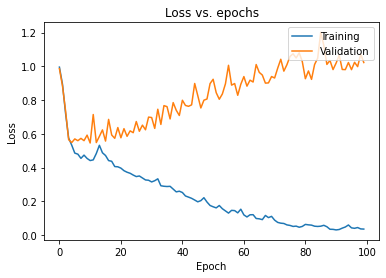

In [122]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [0]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [0]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],), kernel_regularizer=tf.keras.regularizers.l1_l2(wd)),
        Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(wd)),
        Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [151]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_95 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_96 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)             

In [0]:
# Compile the model
model.compile(optimizer='adam', loss = 'mse', metrics = ['mse'])



In [153]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100, verbose=True, validation_split=0.25, batch_size=64)



Epoch 1/100
5/5 [==============================] - 0s 41ms/step - loss: 7.4486 - mse: 1.0299 - val_loss: 7.0232 - val_mse: 0.9919
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 6.8396 - mse: 1.0242 - val_loss: 6.4412 - val_mse: 0.9854
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 6.2761 - mse: 1.0199 - val_loss: 5.9042 - val_mse: 0.9797
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 5.7525 - mse: 1.0111 - val_loss: 5.4100 - val_mse: 0.9720
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 5.2706 - mse: 0.9992 - val_loss: 4.9600 - val_mse: 0.9642
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 4.8320 - mse: 0.9873 - val_loss: 4.5307 - val_mse: 0.9352
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 4.4210 - mse: 0.9612 - val_loss: 4.1386 - val_mse: 0.9020
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 4.0320 - mse: 0.91

In [154]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target)


2/2 [==============================] - 0s 3ms/step - loss: 0.4488 - mse: 0.2981


[0.44877904653549194, 0.29805195331573486]

#### Plot the learning curves

In [0]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [0]:
def on_train_begin(self, logs=None):
      # Do something

    def on_train_batch_begin(self, batch, logs=None):
      # DO Something

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.1:
            print("\nReached loss less than 0.4 so cancelling training!")
            self.model.stop_training = True

In [0]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_train_begin(self, logs=None):
    print("String training...")
  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch} ")
  def on_train_batch_begin(self, batch, logs=None):
    print(f"Staring batch {batch}")
  def on_train_batch_end(self, batch, logs=None):
    print(f"Ending batch {batch}")
  def on_epoch_end(self, epoch, logs=None):
    print(f"Ending epoch {epoch} ")
  def on_train_end(self, logs=None):
    print("Ending training...")


class TestingCallback(Callback):
  def on_test_begin(self, logs=None):
    print("String testing...")
  def on_test_batch_begin(self, batch, logs=None):
    print(f"Staring batch {batch}")
  def on_test_batch_end(self, batch, logs=None):
    print(f"Ending batch {batch}")
  def on_test_end(self, logs=None):
    print("Ending testing...")

class PredictionCallback(Callback):
  def on_predict_begin(self, logs=None):
    print("String Predicting...")
  def on_predict_batch_begin(self, batch, logs=None):
    print(f"Staring batch {batch}")
  def on_predict_batch_end(self, batch, logs=None):
    print(f"Ending batch {batch}")
  def on_predict_end(self, logs=None):
    print("Ending Predicting...")

In [0]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)


In [0]:
# Compile the model
model.compile(optimizer='adam', loss = 'mse')



#### Train the model with the callback

In [166]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_target, epochs=3, verbose=True, validation_split=0.25, batch_size=64, callbacks=TrainingCallback())


String training...
Starting epoch 0 
Epoch 1/3
Staring batch 0
Ending batch 0
1/5 [=====>........................] - ETA: 0s - loss: 5.7922Staring batch 1
Ending batch 1
Staring batch 2
Ending batch 2
Staring batch 3
Ending batch 3
Staring batch 4
Ending batch 4
Ending epoch 0 
5/5 [==============================] - 0s 13ms/step - loss: 5.7467 - val_loss: 5.4087
Starting epoch 1 
Epoch 2/3
Staring batch 0
Ending batch 0
1/5 [=====>........................] - ETA: 0s - loss: 5.3024Staring batch 1
Ending batch 1
Staring batch 2
Ending batch 2
Staring batch 3
Ending batch 3
Staring batch 4
Ending batch 4
Ending epoch 1 
5/5 [==============================] - 0s 13ms/step - loss: 5.2684 - val_loss: 4.9534
Starting epoch 2 
Epoch 3/3
Staring batch 0
Ending batch 0
1/5 [=====>........................] - ETA: 0s - loss: 4.8643Staring batch 1
Ending batch 1
Staring batch 2
Ending batch 2
Staring batch 3
Ending batch 3
Staring batch 4
Ending batch 4
Ending epoch 2 
5/5 [========================

In [170]:
# Evaluate the model
model.evaluate(test_data, test_target, callbacks=TestingCallback())



String testing...
Staring batch 0
Ending batch 0
1/2 [==============>...............] - ETA: 0s - loss: 4.1034Staring batch 1
Ending batch 1
Ending testing...
2/2 [==============================] - 0s 3ms/step - loss: 4.3361


4.336143970489502

In [177]:
# Make predictions with the model

model.predict(test_data, verbose = 2, callbacks = PredictionCallback())

String Predicting...
Staring batch 0
Ending batch 0
Staring batch 1
Ending batch 1
Ending Predicting...
2/2 - 0s


array([[ 0.01962936],
       [ 0.02418252],
       [ 0.06772788],
       [ 0.07983747],
       [ 0.02997447],
       [ 0.00190799],
       [ 0.05719713],
       [ 0.00299064],
       [ 0.06723948],
       [ 0.06486434],
       [ 0.08883544],
       [ 0.06591947],
       [ 0.06031504],
       [ 0.01213389],
       [-0.00393943],
       [ 0.06097684],
       [ 0.01603856],
       [-0.01596471],
       [ 0.04897512],
       [ 0.00601294],
       [ 0.08271262],
       [ 0.09782931],
       [ 0.09545349],
       [-0.01156178],
       [ 0.05171742],
       [ 0.07227406],
       [ 0.06811918],
       [ 0.04895307],
       [-0.00524805],
       [ 0.03379219],
       [ 0.08683465],
       [ 0.06728247],
       [ 0.07472287],
       [ 0.01899419],
       [ 0.10388301],
       [ 0.06231426],
       [ 0.05690415],
       [ 0.04659983],
       [ 0.03802149],
       [-0.00556588],
       [ 0.07880424],
       [ 0.10586664],
       [ 0.07274408],
       [ 0.04089569],
       [-0.012924  ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [197]:
# Re-train the unregularised model

from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, delta=0.01, mode='max')

unregularized_model = get_model()
unregularized_model.compile(optimizer='adam', loss = 'mse')
unreg_history = unregularized_model.fit(train_data, train_target, epochs=100, verbose=True, validation_split=0.15, batch_size=64, callbacks=[EarlyStopping(patience=2)])





Epoch 1/100
6/6 [==============================] - 0s 21ms/step - loss: 1.0325 - val_loss: 0.8509
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9271 - val_loss: 0.7552
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6776 - val_loss: 0.6991
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5391 - val_loss: 0.7732
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5339 - val_loss: 0.6518
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5326 - val_loss: 0.5002
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5148 - val_loss: 0.8515
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5681 - val_loss: 0.5185


In [198]:
# Evaluate the model on the test set
unregularized_model.evaluate(test_data, test_target, verbose=2)


2/2 - 0s - loss: 0.3081


0.3080785870552063

In [199]:
# Re-train the regularised model
regularized_model = get_regularised_model(1e-8, 0.2)
regularized_model.compile(optimizer='adam', loss = 'mse')
reg_history = regularized_model.fit(train_data, train_target, epochs=100, verbose=True, validation_split=0.15, batch_size=64, callbacks=[EarlyStopping(patience=2)])





Epoch 1/100
6/6 [==============================] - 0s 33ms/step - loss: 7.3711 - val_loss: 6.7460
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 6.6536 - val_loss: 6.0815
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 5.9975 - val_loss: 5.4667
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 5.3994 - val_loss: 4.9197
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 4.8586 - val_loss: 4.4148
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 4.3621 - val_loss: 3.9789
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 3.8895 - val_loss: 3.5486
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 3.4531 - val_loss: 3.2224
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 3.0484 - val_loss: 2.8645
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 2.7582 - val_loss: 2.5350
Epoch 11/100
6/6 [==========

In [200]:
# Evaluate the model on the test set
regularized_model.evaluate(test_data, test_target, verbose=2)



2/2 - 0s - loss: 0.8359


0.8359156250953674

#### Plot the learning curves

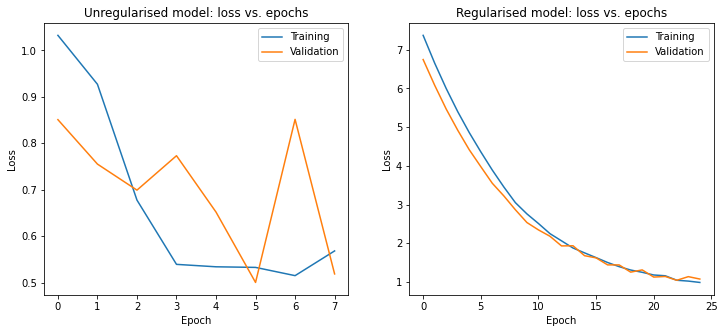

In [201]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()